### Logistic Regression :  
Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm. It is used when the dependent variable(target) is categorical. For example, To predict whether an email is spam (1) or (0) Whether the tumor is malignant (1) or not (0) etc.

**importing Pandas library**

In [1]:
import pandas as pd

**importing dataset with Github URL**

**Case study:** Data is related with direct marketing campaigns(phone calls) of a Portuguese banking institution.
Classification goal is to predict the client will subscribe (1/0) a term deposit(variable y).

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


**Description of dataset**  

The dataset provides the customer information. It includes 41188 records and 21 fields.

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)
18 - cons.conf.idx: consumer confidence index - (numeric)

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

**importing matplotlib library**

In [3]:
import matplotlib.pyplot as plt

In [4]:
data = data.dropna() #any null value, entire row gets dropped
print(data.shape)

(41188, 21)


**importing numpy library**

In [5]:
import numpy as np

Education column has many categories and we need to reduce the categories for better modelling.

In [6]:
data.education.unique() # gives all unique values present in column eduction

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

We can combine categories basic.9y, basic.4y, basic.6y into one category i.e. Basic

In [7]:
#np.where(condition,True,False)
data['education'] = np.where(data['education'] == 'basic.9y','Basic',data['education'])
data['education'] = np.where(data['education'] == 'basic.4y','Basic',data['education'])
data['education'] = np.where(data['education'] == 'basic.6y','Basic',data['education'])

In [8]:
data.education.unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

###  **Data exploration**

**Predicted variable** :  
y : has the client subscribed a term deposite? (values 1/0)

In [9]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


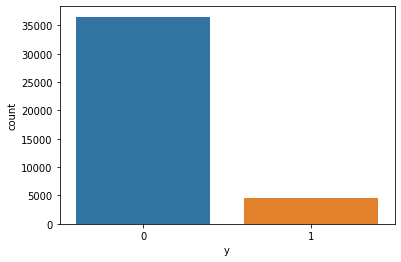

In [10]:
import seaborn as sns #importing seaborn library
sns.countplot(x='y',data = data) # plotting the y variable
plt.show()

In [11]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [12]:
data.job.unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student'], dtype=object)

In [13]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [14]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [15]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


**Graphical representation of Job vs Purchase**

In [16]:
pd.crosstab(data.job,data.y)

y,0,1
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


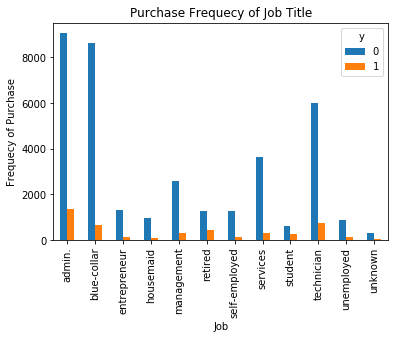

In [17]:
pd.crosstab(data.job,data.y).plot(kind='bar')#plotting bar chart
plt.title('Purchase Frequecy of Job Title')
plt.xlabel('Job')
plt.ylabel('Frequecy of Purchase')
plt.show()

**Graphical representation of marital status vs Purchase**

In [18]:
table = pd.crosstab(data.marital,data.y)
table

y,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


table.sum(1) gives sum of rows  
table.sum(0) gives sum of column 

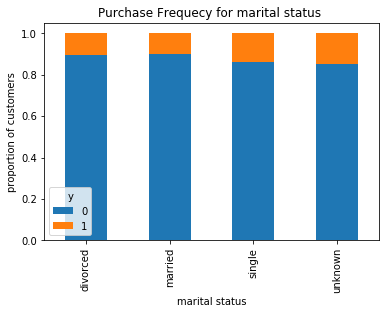

In [19]:
table = pd.crosstab(data.marital,data.y)
table.div(table.sum(1),axis = 0).plot(kind = "bar",stacked = True) # plotting stacked bar chart
plt.title('Purchase Frequecy for marital status ')
plt.xlabel('marital status')
plt.ylabel('proportion of customers')
plt.show()

**Graphical representation of education vs Purchase**

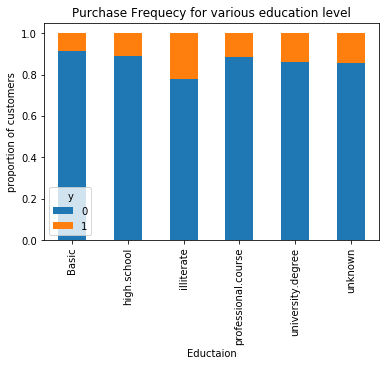

In [20]:
table = pd.crosstab(data.education,data.y)
table.div(table.sum(1),axis = 0).plot(kind = "bar",stacked = True)
plt.title('Purchase Frequecy for various education level')
plt.xlabel('Eductaion')
plt.ylabel('proportion of customers')
plt.show()

**Create dummy variables**

In [21]:
data.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0


In [22]:
cat_vars = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
len(cat_vars)

10

In [23]:
for var in cat_vars:
    cat_list = pd.get_dummies(data[var],prefix = var) # creating dummy varibles 
    data1 = data.join(cat_list) # joining the newly created dummy varible with the existing data frame 
    data = data1

In [24]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', '

In [25]:
data.shape

(41188, 72)

In [26]:
data_vars = data.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars] # shortcut of writing loop to check if any columns are present in cat_vars

In [27]:
len(to_keep)

62

In [28]:
data_final =data[to_keep]

In [29]:
data_final

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,...,0,0,0,0,1,0,0,0,1,0
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,0,0,0,0,1,0,0,0,1,0
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,1,0,1,0
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,...,1,0,0,0,0,1,0,0,1,0


In [30]:
X =  data_final.loc[:, data_final.columns != 'y'] #Assigning predictor varibles to X
y =  data_final.loc[:, data_final.columns == 'y'] #Assiging response variable to y

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

**Splitting data into training and testing data(80:20 ratio)**

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)

**Creating object of class LogisticRegression()**

In [33]:
logereg = LogisticRegression()

**Fitting the training data and predicting**

In [34]:
logereg.fit(X_train,y_train)
y_pred = logereg.predict(X_test) #threshold= 0.5

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
from sklearn import metrics 

**Calculating accuracy**

In [36]:
metrics.accuracy_score(y_test,y_pred)

0.9089584850691915

This is an imbalance dataset,so accuracy will not be a good measure as it does not tell the true story.  
We consider precision, recall & f1 score for measure.  
f1 score: Harmonic mean of precision and recall  
Harmonic mean = (Precision+Recall)/2(Precision*Recall)

In [37]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7341
           1       0.62      0.43      0.51       897

    accuracy                           0.91      8238
   macro avg       0.77      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238



**with new threshold**

In [38]:
logereg.predict(X_test[:1]) # predict gives us its classification value as 1/0
# checking for first record

array([1], dtype=int64)

In [39]:
preds1 = logereg.predict_proba(X_test[:1])[:,1] # predict proba gives us actual probability value
preds1 # checking for first record

array([0.8549839])

In [40]:
Threshold = 0.4
preds1 = logereg.predict_proba(X_test)[:,1]
preds = np.where(preds1>Threshold,1,0)

threshold_score = pd.DataFrame(data = [metrics.accuracy_score(y_test,preds),
                                      metrics.recall_score(y_test,preds),
                                      metrics.precision_score(y_test,preds),
                                      metrics.roc_auc_score(y_test,preds)],
                              index = ['accuracy','recall','precision','roc_score'],columns = ['values'])

threshold_score

,values
accuracy,0.908352
recall,0.523969
precision,0.588972
roc_score,0.739644


In [41]:
print(metrics.classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7341
           1       0.59      0.52      0.55       897

    accuracy                           0.91      8238
   macro avg       0.77      0.74      0.75      8238
weighted avg       0.90      0.91      0.91      8238

